### Rate - признак давления/скорости течения газов
Если подумать то есть некое базовое смещение ~180 получасовок + rate влияет на это смещение в +/-


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [2]:
from constants import FEATURE_COLUMNS, FEATURE_GASES, TARGET_COLUMNS, FEATURE_GASES_MASS, TARGET_COLUMNS_MASS

from load_data import load_data
from processing import process
from modelling import evaluate_training, plot_fitted_values
from submission import create_submission
from evaluate import predict
from plotting import plot_submition

ImportError: cannot import name 'plot_fitted_values' from 'modelling' (c:\dev\ds-comps\sibur-challenge-2020-task1\modelling.py)

In [4]:
train_features, train_targets, test_features = load_data()

train_features, train_targets, test_features = process(
        (train_features, train_targets, test_features))

train_data = pd.concat([train_targets, train_features], axis=1)

In [5]:
train_data.head()

,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10,A_rate,B_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,...,A_nC5H12,A_C6H14,A_CH4_specified,A_C2H6_specified,A_C3H8_specified,A_iC4H10_specified,A_nC4H10_specified,A_iC5H12_specified,A_nC5H12_specified,A_C6H14_specified
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,4.561979,39.015486,17.250740,24.301793,70.855017,71.982789,0.126244,5.242957,41.94148,17.064213,...,4.062079,4.11017,0.124266,5.160814,41.284372,16.796864,22.842380,4.119283,3.998438,4.045775
2020-01-01 00:30:00,4.556172,39.032758,17.239769,24.278888,70.855017,71.973649,0.126244,5.242957,41.94148,17.064213,...,4.062079,4.11017,0.124282,5.161469,41.289615,16.798997,22.845281,4.119806,3.998946,4.046289
2020-01-01 01:00:00,4.538603,38.937981,17.215523,24.263735,70.855017,71.935849,0.126244,5.242957,41.94148,17.064213,...,4.062079,4.11017,0.124347,5.164181,41.311311,16.807824,22.857285,4.121971,4.001047,4.048415
2020-01-01 01:30:00,4.551377,38.974181,17.216349,24.232353,70.855017,71.909199,0.126244,5.242957,41.94148,17.064213,...,4.062079,4.11017,0.124394,5.166095,41.326622,16.814054,22.865756,4.123498,4.002530,4.049915
2020-01-01 02:00:00,4.564143,38.938550,17.191849,24.190752,70.855017,71.778992,0.126244,5.242957,41.94148,17.064213,...,4.062079,4.11017,0.124619,5.175467,41.401588,16.844554,22.907235,4.130978,4.009790,4.057262


In [3]:
for gas in ['C2H6','C3H8','iC4H10','nC4H10']:
    fig = go.Figure()
    b_gas = f"B_{gas}"
    a_gas = f"A_{gas}"
    fig.add_trace(go.Scatter(x=train_data.index, y=train_data[b_gas], name=b_gas))
    fig.add_trace(go.Scatter(x=train_data.index, y=train_data[a_gas], name=a_gas))
    fig.add_trace(go.Scatter(x=train_data.index, y=train_data["A_rate"], name='A_rate'))
    fig.add_trace(go.Scatter(x=train_data.index, y=train_data["B_rate"], name='B_rate'))
    fig.show()

NameError: name 'train_data' is not defined

In [7]:
train_data.corr().style.background_gradient(cmap='RdBu')

,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10,A_rate,B_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,A_CH4_specified,A_C2H6_specified,A_C3H8_specified,A_iC4H10_specified,A_nC4H10_specified,A_iC5H12_specified,A_nC5H12_specified,A_C6H14_specified
B_C2H6,1.000000,-0.134681,-0.645926,-0.729567,-0.240048,0.503041,0.304127,0.974957,0.225236,-0.782365,-0.778954,0.002435,-0.154049,0.155453,0.225599,0.919374,-0.497469,-0.735667,-0.738791,-0.402283,-0.500837,-0.287021
B_C3H8,-0.134681,1.000000,0.397637,-0.037838,0.249496,0.003493,-0.511882,-0.155932,0.659459,0.244100,-0.009612,-0.630579,-0.668187,-0.554733,-0.492674,-0.124264,0.427690,0.229983,0.140294,-0.310317,-0.303325,-0.270900
B_iC4H10,-0.645926,0.397637,1.000000,0.772737,0.178531,-0.243082,-0.463860,-0.669523,-0.071472,0.915629,0.727131,-0.541437,-0.459340,-0.280515,-0.431145,-0.687508,0.305155,0.569065,0.531087,-0.145020,-0.059612,0.019019
B_nC4H10,-0.729567,-0.037838,0.772737,1.000000,0.119014,-0.438358,-0.369290,-0.743390,-0.505963,0.870916,0.957001,-0.176768,-0.092735,-0.052750,-0.315834,-0.734298,0.262255,0.656447,0.706730,0.192508,0.260036,0.261384
A_rate,-0.240048,0.249496,0.178531,0.119014,1.000000,0.134084,-0.313968,-0.218209,0.179440,0.169679,0.167851,-0.228887,-0.129156,-0.267142,-0.178533,0.008193,0.680487,0.545343,0.507613,0.272541,0.342367,0.235048
B_rate,0.503041,0.003493,-0.243082,-0.438358,0.134084,1.000000,-0.048168,0.561496,0.394002,-0.379565,-0.497581,-0.211830,-0.240179,-0.246877,-0.167188,0.389115,-0.554372,-0.697577,-0.714742,-0.653559,-0.662161,-0.662380
A_CH4,0.304127,-0.511882,-0.463860,-0.369290,-0.313968,-0.048168,1.000000,0.299781,-0.138617,-0.465387,-0.396674,0.334607,0.378944,0.459301,0.977861,0.304781,-0.256975,-0.322271,-0.309067,0.100219,0.112755,0.203674
A_C2H6,0.974957,-0.155932,-0.669523,-0.743390,-0.218209,0.561496,0.299781,1.000000,0.299652,-0.809977,-0.821000,-0.005559,-0.161134,0.051720,0.213649,0.938758,-0.501605,-0.770539,-0.778526,-0.432610,-0.531469,-0.383118
A_C3H8,0.225236,0.659459,-0.071472,-0.505963,0.179440,0.394002,-0.138617,0.299652,1.000000,-0.266127,-0.571406,-0.550944,-0.576598,-0.697606,-0.175156,0.289596,0.180091,-0.244795,-0.356972,-0.522396,-0.515309,-0.622776
A_iC4H10,-0.782365,0.244100,0.915629,0.870916,0.169679,-0.379565,-0.465387,-0.809977,-0.266127,1.000000,0.884616,-0.372717,-0.282998,-0.212413,-0.417685,-0.812616,0.338873,0.684761,0.671216,0.046782,0.127196,0.139092


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [9]:
pca=PCA()
train_features_reduced=pca.fit_transform(scale(train_features))

In [11]:
train_features_reduced.shape

(5808, 18)

In [12]:
pca.explained_variance_ratio_

array([4.11757195e-01, 2.71210537e-01, 1.22254049e-01, 7.21684237e-02,
       5.21068504e-02, 4.08784122e-02, 1.99517244e-02, 6.36990876e-03,
       2.66940291e-03, 2.51928246e-04, 2.00503968e-04, 5.85229969e-05,
       4.25939807e-05, 3.89284187e-05, 2.63672680e-05, 8.51904454e-06,
       5.20258354e-06, 9.29629431e-07])

In [13]:
explained_variance_ratio=np.cumsum(np.round(pca.explained_variance_ratio_ , decimals=4)* 100)

In [15]:
explained_variance_ratio

array([ 41.18,  68.3 ,  80.53,  87.75,  92.96,  97.05,  99.05,  99.69,
        99.96,  99.99, 100.01, 100.02, 100.02, 100.02, 100.02, 100.02,
       100.02, 100.02])

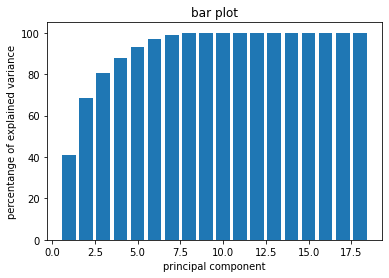

In [14]:
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('bar plot')
plt.show()